In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import io

In [ ]:
#Import data
#Import the CSV file to Google Colab and thereafter, to the colab sheet by copy pasting the path
df = pd.read_csv('/content/MA PROJECT.csv')
df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,One year,0,Mailed check,56.95,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,Month-to-month,1,Mailed check,53.85,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,One year,0,Bank transfer (automatic),42.30,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1


In [ ]:
#Create dummy variable
dummies = pd.get_dummies(df.InternetService)
dummies

,DSL,Fiber optic,No
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False
...,...,...,...
7038,True,False,False
7039,False,True,False
7040,True,False,False
7041,False,True,False


In [ ]:
#Join the two dataframes using concat method
df = pd.concat([df,dummies], axis=1)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,DSL,Fiber optic,No
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,Month-to-month,1,Electronic check,29.85,0,True,False,False
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,One year,0,Mailed check,56.95,0,True,False,False
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,Month-to-month,1,Mailed check,53.85,1,True,False,False
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,One year,0,Bank transfer (automatic),42.30,0,True,False,False
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,1,False,True,False


In [ ]:
df.shape

(7043, 21)

In [ ]:
#Rename the dummy variable columns
df.rename(columns={1:'DSL', 2:'Fiber optic', 3:'No'}, inplace=True)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,DSL,Fiber optic,No
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,Month-to-month,1,Electronic check,29.85,0,True,False,False
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,One year,0,Mailed check,56.95,0,True,False,False
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,Month-to-month,1,Mailed check,53.85,1,True,False,False
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,One year,0,Bank transfer (automatic),42.30,0,True,False,False
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,1,False,True,False


In [ ]:
#Drop the original categorical variable and the base category 'No'
df = df.drop(['InternetService','No'], axis=1)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,DSL,Fiber optic
0,0,0,1,0,1,0,0,0,1,0,0,0,Month-to-month,1,Electronic check,29.85,0,True,False
1,1,0,0,0,34,1,0,1,0,1,0,0,One year,0,Mailed check,56.95,0,True,False
2,1,0,0,0,2,1,0,1,1,0,0,0,Month-to-month,1,Mailed check,53.85,1,True,False
3,1,0,0,0,45,0,0,1,0,1,1,0,One year,0,Bank transfer (automatic),42.30,0,True,False
4,0,0,0,0,2,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1,False,True


In [ ]:
df.shape

(7043, 19)

In [ ]:
#Create dummy variable
dummies = pd.get_dummies(df.Contract)
dummies

,Month-to-month,One year,Two year
0,True,False,False
1,False,True,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
7038,False,True,False
7039,False,True,False
7040,True,False,False
7041,True,False,False


In [ ]:
#Join the two dataframes using concat method
df = pd.concat([df,dummies], axis=1)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,DSL,Fiber optic,Month-to-month,One year,Two year
0,0,0,1,0,1,0,0,0,1,0,...,Month-to-month,1,Electronic check,29.85,0,True,False,True,False,False
1,1,0,0,0,34,1,0,1,0,1,...,One year,0,Mailed check,56.95,0,True,False,False,True,False
2,1,0,0,0,2,1,0,1,1,0,...,Month-to-month,1,Mailed check,53.85,1,True,False,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,One year,0,Bank transfer (automatic),42.30,0,True,False,False,True,False
4,0,0,0,0,2,1,0,0,0,0,...,Month-to-month,1,Electronic check,70.70,1,False,True,True,False,False


In [ ]:
df.shape

(7043, 22)

In [ ]:
#Drop the original categorical variable and the base category 'two year'
df = df.drop(['Contract','Two year'], axis=1)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,DSL,Fiber optic,Month-to-month,One year
0,0,0,1,0,1,0,0,0,1,0,0,0,1,Electronic check,29.85,0,True,False,True,False
1,1,0,0,0,34,1,0,1,0,1,0,0,0,Mailed check,56.95,0,True,False,False,True
2,1,0,0,0,2,1,0,1,1,0,0,0,1,Mailed check,53.85,1,True,False,True,False
3,1,0,0,0,45,0,0,1,0,1,1,0,0,Bank transfer (automatic),42.30,0,True,False,False,True
4,0,0,0,0,2,1,0,0,0,0,0,0,1,Electronic check,70.70,1,False,True,True,False


In [ ]:
df.shape

(7043, 20)

In [ ]:
#Create dummy variable
dummies = pd.get_dummies(df.PaymentMethod)
dummies

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,False,False,True,False
1,False,False,False,True
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
7038,False,False,False,True
7039,False,True,False,False
7040,False,False,True,False
7041,False,False,False,True


In [ ]:
#Join the two dataframes using concat method
df = pd.concat([df,dummies], axis=1)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,Churn,DSL,Fiber optic,Month-to-month,One year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,0,True,False,True,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,0,True,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,1,True,False,True,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,0,True,False,False,True,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,1,False,True,True,False,False,False,True,False


In [ ]:
df.shape

(7043, 24)

In [ ]:
#Drop the original categorical variable and the base category 'Credit card (automatic)'
df = df.drop(['PaymentMethod','Credit card (automatic)'], axis=1)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,Churn,DSL,Fiber optic,Month-to-month,One year,Bank transfer (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,0,True,False,True,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,0,True,False,False,True,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,1,True,False,True,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,0,True,False,False,True,True,False,False
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,1,False,True,True,False,False,True,False


In [ ]:
df.shape

(7043, 22)

In [ ]:
#Split data into training and validation (test) sets
import random
from sklearn.model_selection import train_test_split
random.seed(3277)
train_df, test_df = train_test_split(df, test_size=0.4)

In [ ]:
# This cell should be executed first
import random
from sklearn.model_selection import train_test_split

# Assuming 'df' is defined before this cell
random.seed(3277)
train_df, test_df = train_test_split(df, test_size=0.4)

# Now you can use train_df in the following cells
train_df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,Churn,DSL,Fiber optic,Month-to-month,One year,Bank transfer (automatic),Electronic check,Mailed check
6158,1,0,0,0,2,1,0,0,0,0,...,1,19.65,0,False,False,True,False,False,True,False
3813,1,0,1,1,69,1,1,0,1,1,...,1,105.00,0,False,True,False,False,False,True,False
6369,1,1,0,0,67,1,0,1,1,0,...,1,105.05,0,False,True,False,False,False,True,False
2114,1,0,0,0,40,1,0,1,1,0,...,1,61.90,0,True,False,True,False,False,False,True
1334,0,1,0,0,1,0,0,0,0,0,...,1,25.20,1,True,False,True,False,False,True,False


In [ ]:
train_df.head()

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,Churn,DSL,Fiber optic,Month-to-month,One year,Bank transfer (automatic),Electronic check,Mailed check
6158,1,0,0,0,2,1,0,0,0,0,...,1,19.65,0,False,False,True,False,False,True,False
3813,1,0,1,1,69,1,1,0,1,1,...,1,105.00,0,False,True,False,False,False,True,False
6369,1,1,0,0,67,1,0,1,1,0,...,1,105.05,0,False,True,False,False,False,True,False
2114,1,0,0,0,40,1,0,1,1,0,...,1,61.90,0,True,False,True,False,False,False,True
1334,0,1,0,0,1,0,0,0,0,0,...,1,25.20,1,True,False,True,False,False,True,False


In [ ]:
train_df.shape

(4225, 22)

In [ ]:
test_df.shape

(2818, 22)

In [ ]:
#Since the data is already split into train and test datasets, load the values into X_train, y_train, X_test, y_test
#This step is undertaken to identify independent and dependent variables in training and test data
X_train = train_df[['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'PaperlessBilling', 'MonthlyCharges',
                    'DSL', 'Fiber optic', 'Month-to-month', 'One year', 'Bank transfer (automatic)', 'Electronic check',
                    'Mailed check']]
y_train = train_df[['Churn']]
X_test = test_df[['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'PaperlessBilling', 'MonthlyCharges',
                    'DSL', 'Fiber optic', 'Month-to-month', 'One year', 'Bank transfer (automatic)', 'Electronic check',
                    'Mailed check'
                  ]]
y_test = test_df[['Churn']]


In [ ]:
#Data exploration
y_test.value_counts()

,count
Churn,
0,2077
1,741


In [ ]:
#Data exploration
y_train.value_counts()

,count
Churn,
0,3097
1,1128


In [ ]:
#Model development
#Import the Scikit Learn Logistic Regression module
#Fit model on training data using fit()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Perform prediction on test set using predict
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#Probability of belonging to class 0, probability of belonging to class 1
probability=logreg.predict_proba(X_test)
probability

array([[0.39391674, 0.60608326],
       [0.95806858, 0.04193142],
       [0.70361647, 0.29638353],
       ...,
       [0.55318484, 0.44681516],
       [0.97813528, 0.02186472],
       [0.86105422, 0.13894578]])

In [ ]:
probability = pd.DataFrame(probability, columns = ['Probability[0]', 'Probability[1]'])
pd.options.display.float_format = '{:.3f}'.format
probability

,Probability[0],Probability[1]
0,0.394,0.606
1,0.958,0.042
2,0.704,0.296
3,0.696,0.304
4,0.529,0.471
...,...,...
2813,0.257,0.743
2814,0.988,0.012
2815,0.553,0.447
2816,0.978,0.022


In [ ]:
#Evaluate the model using confusion matrix
#This step assesses how well your model did on predictions
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1827,  250],
       [ 329,  412]])

In [ ]:
#Model validation parameters obtained from confusion matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7945351312987935
Precision: 0.622356495468278
Recall: 0.5560053981106613


Text(0.5, 427.9555555555555, 'Predicted label')

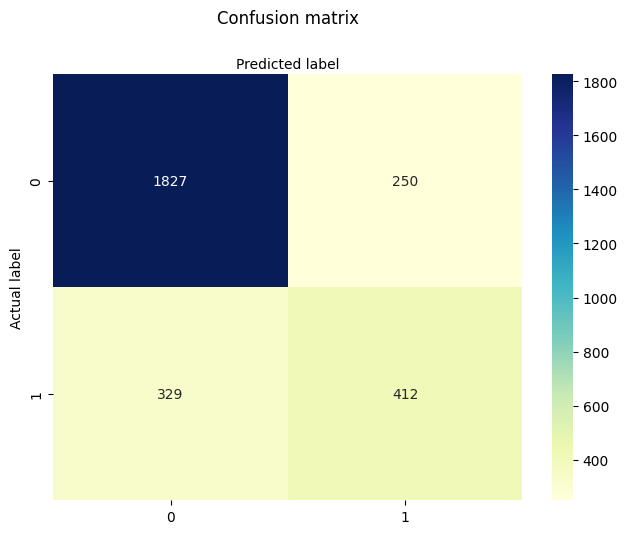

In [ ]:
#Visualization of confusion matrix//
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
import seaborn as sns
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Calculation of regression coefficients
cf = logreg.coef_
print(cf)

[[ 0.03924339  0.18774133 -0.06997713 -0.13758364 -0.03698383 -1.31449399
   0.21559248 -0.54621007 -0.29346377 -0.26341964 -0.43891548 -0.03128956
   0.2386686   0.02786643  0.14918408  0.54705577  0.98379167  0.52039652
   0.11174508  0.29946384  0.0256475 ]]


In [ ]:
#Creating a dataframe of coefficients
cf = pd.DataFrame(cf, columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'PaperlessBilling', 'MonthlyCharges',
                    'DSL', 'Fiber optic', 'Month-to-month', 'One year', 'Bank transfer (automatic)', 'Electronic check',
                    'Mailed check'
                   ], index = ['Coefficient'])
cf.round(decimals = 3)

,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,PaperlessBilling,MonthlyCharges,DSL,Fiber optic,Month-to-month,One year,Bank transfer (automatic),Electronic check,Mailed check
Coefficient,0.039,0.188,-0.070,-0.138,-0.037,-1.314,0.216,-0.546,-0.293,-0.263,...,-0.031,0.239,0.028,0.149,0.547,0.984,0.520,0.112,0.299,0.026


In [ ]:
#Calculation of regression intercept
intercept = logreg.intercept_
print (intercept)

[-1.79388292]


In [ ]:
#Creating a dataframe of intercepts
intercept = pd.DataFrame(intercept, columns = ['Intercept'],index = ['Coefficient'])
intercept.round(decimals = 3)

,Intercept
Coefficient,-1.794


In [ ]:
##logit model
#Join the two dataframes - cf and intercept using concat method
coeff_model = pd.concat ([intercept, cf], axis = 1)
coeff_model.round(decimals = 3)

,Intercept,Gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingTV,PaperlessBilling,MonthlyCharges,DSL,Fiber optic,Month-to-month,One year,Bank transfer (automatic),Electronic check,Mailed check
Coefficient,-1.794,0.039,0.188,-0.070,-0.138,-0.037,-1.314,0.216,-0.546,-0.293,...,-0.031,0.239,0.028,0.149,0.547,0.984,0.520,0.112,0.299,0.026


In [ ]:
#Presenting the coefficients columnwise
coefficient = coeff_model.iloc[0]
coefficient.round (decimals = 3)

,Coefficient
Intercept,-1.794
Gender,0.039
SeniorCitizen,0.188
Partner,-0.070
Dependents,-0.138
tenure,-0.037
PhoneService,-1.314
MultipleLines,0.216
OnlineSecurity,-0.546
OnlineBackup,-0.293


In [ ]:
#odds model
import math
def sigmoid(x):
  return math.exp(x)

for i in coefficient:
  print (sigmoid(i))

0.16631313291562236
1.0400235853550688
1.2065213890574555
0.9324151462534761
0.8714614548655031
0.9636917198294532
0.2686102077642131
1.2405967133241662
0.5791405593810811
0.7456762345435572
0.7684193694383985
0.6447352701973036
0.9691948957470511
1.2695577407801009
1.02825832595596
1.1608866668493023
1.7281574274845544
2.674578168052337
1.6826947416534512
1.1182277694610772
1.3491352665740601
1.0259792260332246


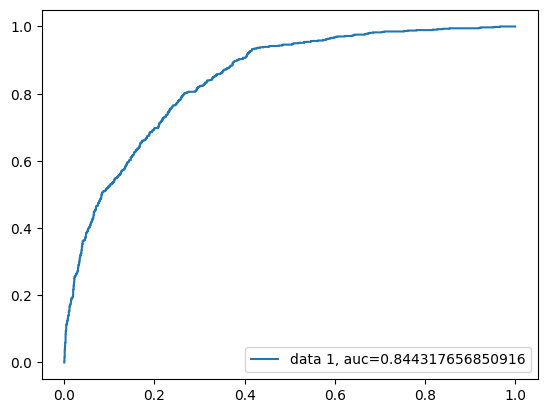

In [ ]:
#ROC (Receiver Operating Characteristics) Curve
#Plotting true positive rate against false positive rate. Shows tradeoff between sensitivity and specificity.

#What is AUC - ROC Curve? (credit https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
#AUC - ROC curve
#Is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

#The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()